In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, make_scorer, f1_score, r2_score

from sklearn.model_selection import GridSearchCV

In [14]:
base_credito = pd.read_csv('C:\\Users\\diogo\\OneDrive\\Documentos\\Profissional\\Machine Learning\\credit_default\\base_dados\\UCI_Credit_Card.csv')

In [15]:
base_credito.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [16]:
base_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [17]:
#não há problema na base de dados de valores nulos
base_credito.isna().value_counts()

ID     LIMIT_BAL  SEX    EDUCATION  MARRIAGE  AGE    PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month
False  False      False  False      False     False  False  False  False  False  False  False  False      False      False      False      False      False      False     False     False     False     False     False     False                         30000
Name: count, dtype: int64

In [ ]:
# Observando o significado das colunas, temos as seguintes informações sobre:
# LIMIT_BAL: Quantidade de crédito liberada para o cliente em USD, incluindo o crédito individual e crédito supplementar/familiar
# SEX: 1 = homem; 2-mulher
# MARRIAGE: 1 = casado(a); 2 = solteiro(a); 3 = outros
# AGE: Idade em anos
# PAY_0: Status do pagamento de acordo com o mês -2= não usou, -1 = pago corretamente; 0 = uso de rotativo,  1 = pago com 1 mês de atraso ... 9 = pagamento com 9 meses ou mais de atraso NO MES.  
# .
# .
# .
# BILL_AMT1: Total devido no mês de Setembro, as colunas decrescem de acordo com o número 2: agosto, 3: julho ... 
# PAY_AMT1: Valor pago no mês de Setembro, as colunas DECRESCEM de acordo com o número 2: agosto, 3: julho ...
# default.payment.next.month: Inadimplente 1: sim ; 0: não

In [19]:
# Pelas colunas a intuição inicial é que seja um problema de regressão, também dá para se notar que todas as colunas são numéricas e que os valores das colunas
# variam do mês mais avançado para os meses anteriores. Para uma visualização mais natural, arrumaremos para inverter essa lógica

base_credito = base_credito[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                             'PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2', 'PAY_0',
                             'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1',
                             'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1',
                             'default.payment.next.month' ]]

In [50]:
# Renomeando as colunas para trabalhar de uma maneira mais natural:

base_credito.columns = ['id', 'lim_credito', 'sexo', 'educacao', 'est_civil', 'idade', 
                        'sts_1', 'sts_2', 'sts_3', 'sts_4', 'sts_5', 'sts_6',
                        'fatura_1', 'fatura_2', 'fatura_3', 'fatura_4', 'fatura_5', 'fatura_6',
                        'v_pg_1', 'v_pg_2', 'v_pg_3', 'v_pg_4', 'v_pg_5', 'v_pg_6',
                        'inadimplente']

In [21]:
base_credito.head(10)

,id,lim_credito,sexo,educacao,est_civil,idade,sts_1,sts_2,sts_3,sts_4,...,v_dev_4,v_dev_5,v_dev_6,v_pg_1,v_pg_2,v_pg_3,v_pg_4,v_pg_5,v_pg_6,inadimplente
0,1,20000.0,2,2,1,24,-2,-2,-1,-1,...,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,1
1,2,120000.0,2,2,2,26,2,0,0,0,...,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,0
4,5,50000.0,1,2,1,57,0,0,0,-1,...,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,57608.0,57069.0,64400.0,800.0,1000.0,1000.0,657.0,1815.0,2500.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,445007.0,412023.0,367965.0,13770.0,13750.0,20239.0,38000.0,40000.0,55000.0,0
7,8,100000.0,2,2,2,23,-1,0,0,-1,...,601.0,380.0,11876.0,1542.0,1687.0,581.0,0.0,601.0,380.0,0
8,9,140000.0,2,3,1,28,0,0,0,2,...,12108.0,14096.0,11285.0,1000.0,1000.0,1000.0,432.0,0.0,3329.0,0
9,10,20000.0,1,3,2,35,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,1122.0,13007.0,0.0,0.0,0.0,0


In [22]:
# Começando a EDA (Exploratory Data Analysis - Análise Exploratória de Dados), separa-se os dados de treino e de teste, onde o target é definir se o cliente será inadimplente no próximo mês


X, y = base_credito.drop(columns=['id', 'inadimplente']) , base_credito['inadimplente'] 

# checa-se o balanceamento dos targets
y.value_counts(normalize=True)


inadimplente
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [23]:
# como os valores são desbalanceados: 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [24]:
matrix_correlacao = base_credito.corr()

<Axes: >

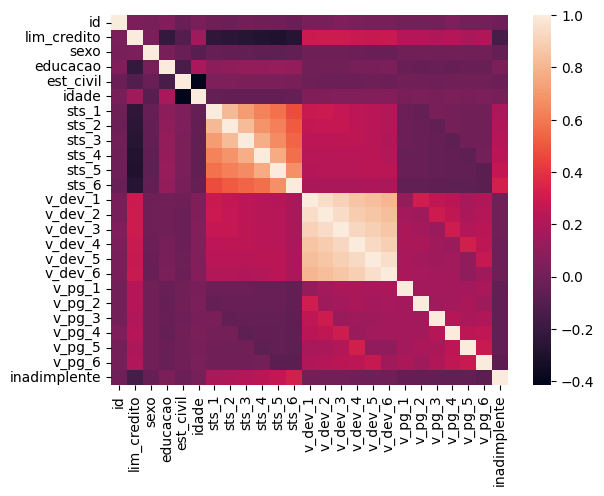

In [25]:
# Com o mapa de correlação podemos notar que as maiores correlações para o target estão relacionadas com os últimos pagamentos
# o que é intuitivo, caso não tenha pago no mês anterior as chances de não pagar no próximo mês é maior, afinal a dívida tende a aumentar
# devido aos juros. 
sns.heatmap(matrix_correlacao)

In [ ]:
# Com isso tentaremos criar uma coluna auxiliar analisando a fatura, para confirmar:

for i in range(1,6):
    aux = 'sts_' + str(i)
    print(base_credito[aux].value_counts(normalize=True))


sts_1
 0    0.542867
-1    0.191333
-2    0.163167
 2    0.092200
 3    0.006133
 4    0.001633
 7    0.001533
 6    0.000633
 5    0.000433
 8    0.000067
Name: proportion, dtype: float64
sts_2
 0    0.564900
-1    0.184633
-2    0.151533
 2    0.087533
 3    0.005933
 4    0.002800
 7    0.001933
 5    0.000567
 6    0.000133
 8    0.000033
Name: proportion, dtype: float64
sts_3
 0    0.548500
-1    0.189567
-2    0.144933
 2    0.105300
 3    0.006000
 4    0.002300
 7    0.001933
 5    0.001167
 6    0.000167
 1    0.000067
 8    0.000067
Name: proportion, dtype: float64
sts_4
 0    0.525467
-1    0.197933
-2    0.136167
 2    0.127300
 3    0.008000
 4    0.002533
 7    0.000900
 6    0.000767
 5    0.000700
 1    0.000133
 8    0.000100
Name: proportion, dtype: float64
sts_5
 0    0.524333
-1    0.201667
 2    0.130900
-2    0.126067
 3    0.010867
 4    0.003300
 1    0.000933
 5    0.000833
 7    0.000667
 6    0.000400
 8    0.000033
Name: proportion, dtype: float64


In [51]:
base_credito[base_credito['fatura_1']<0]

,id,lim_credito,sexo,educacao,est_civil,idade,sts_1,sts_2,sts_3,sts_4,...,fatura_4,fatura_5,fatura_6,v_pg_1,v_pg_2,v_pg_3,v_pg_4,v_pg_5,v_pg_6,inadimplente
26,27,60000.0,1,1,2,27,-1,-1,-1,-1,...,259.0,-425.0,-109.0,1000.0,0.0,500.0,0.0,1000.0,0.0,1
35,36,160000.0,1,1,2,30,-1,-2,-2,-2,...,-527.0,-131.0,30265.0,0.0,792.0,565.0,396.0,396.0,131.0,0
109,110,360000.0,1,2,1,35,-2,-2,-2,-2,...,-103.0,-103.0,-103.0,0.0,0.0,0.0,0.0,0.0,0.0,0
134,135,30000.0,2,2,2,22,0,0,0,0,...,26712.0,26145.0,28452.0,1560.0,0.0,500.0,0.0,1400.0,2000.0,0
167,168,100000.0,1,2,1,27,0,0,0,2,...,58824.0,96847.0,102349.0,50000.0,12.0,1398.0,1330.0,0.0,3166.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29862,29863,50000.0,1,2,1,38,-2,0,0,0,...,3853.0,5404.0,1529.0,7000.0,0.0,0.0,1020.0,1200.0,1200.0,1
29921,29922,410000.0,1,1,2,34,-1,-1,-1,0,...,420393.0,411016.0,468749.0,0.0,0.0,1428.0,1474.0,18600.0,17259.0,1
29922,29923,150000.0,1,2,1,35,-2,-2,-2,-2,...,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
29931,29932,60000.0,1,2,3,41,0,0,0,0,...,44004.0,50643.0,61118.0,28000.0,0.0,0.0,1200.0,2000.0,2200.0,0


In [52]:
base_credito.loc[26]

id                 27.0
lim_credito     60000.0
sexo                1.0
educacao            1.0
est_civil           2.0
idade              27.0
sts_1              -1.0
sts_2              -1.0
sts_3              -1.0
sts_4              -1.0
sts_5              -2.0
sts_6               1.0
fatura_1         -189.0
fatura_2          127.0
fatura_3          -57.0
fatura_4          259.0
fatura_5         -425.0
fatura_6         -109.0
v_pg_1           1000.0
v_pg_2              0.0
v_pg_3            500.0
v_pg_4              0.0
v_pg_5           1000.0
v_pg_6              0.0
inadimplente        1.0
Name: 26, dtype: float64

In [ ]:
# Analisando os valores percebemos que existem faturas com o valor negativo, o que fogem da ideia sobre o valor da fatura. Do total das tinhas é um valor de 5%
# podemos contar como outliers e descartá-los
base_credito[(base_credito['fatura_1']<0) | (base_credito['fatura_2']<0) | (base_credito['fatura_3']<0) | (base_credito['fatura_4']<0) | (base_credito['fatura_5']<0)].shape[0]

1718

In [ ]:
# Aparentemente essas colunas com as faturas negativas estão próximas da mesma proporção inicial, portanto podemos eliminá-las pois não fazem muito sentido para o problema
base_credito[(base_credito['fatura_1']<0) | (base_credito['fatura_2']<0) | (base_credito['fatura_3']<0) | (base_credito['fatura_4']<0) | (base_credito['fatura_5']<0)]['inadimplente'].value_counts(normalize=True)

inadimplente
0    0.830617
1    0.169383
Name: proportion, dtype: float64

In [81]:
base_credito_limpa = base_credito[~((base_credito['fatura_1']<0) | (base_credito['fatura_2']<0) | (base_credito['fatura_3']<0) | (base_credito['fatura_4']<0) | (base_credito['fatura_5']<0))].reset_index(drop=True)

In [ ]:
base_credito_limpa

,id,lim_credito,sexo,educacao,est_civil,idade,sts_1,sts_2,sts_3,sts_4,...,fatura_4,fatura_5,fatura_6,v_pg_1,v_pg_2,v_pg_3,v_pg_4,v_pg_5,v_pg_6,inadimplente
0,1,20000.0,2,2,1,24,-2,-2,-1,-1,...,689.0,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,1
1,2,120000.0,2,2,2,26,2,0,0,0,...,2682.0,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,13559.0,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,49291.0,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,0
4,5,50000.0,1,2,1,57,0,0,0,-1,...,35835.0,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,57608.0,57069.0,64400.0,800.0,1000.0,1000.0,657.0,1815.0,2500.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,445007.0,412023.0,367965.0,13770.0,13750.0,20239.0,38000.0,40000.0,55000.0,0
7,9,140000.0,2,3,1,28,0,0,0,2,...,12108.0,14096.0,11285.0,1000.0,1000.0,1000.0,432.0,0.0,3329.0,0
8,10,20000.0,1,3,2,35,-1,-1,-2,-2,...,0.0,0.0,0.0,0.0,1122.0,13007.0,0.0,0.0,0.0,0
9,11,200000.0,2,3,2,34,-1,0,0,2,...,5535.0,9787.0,11073.0,66.0,3738.0,300.0,50.0,12.0,2306.0,0


In [116]:


base_credito_limpa['aux'] = (base_credito_limpa.iloc[: , 12:18].sum(axis=1)) - (base_credito_limpa.iloc[: , 18:24].sum(axis=1))

In [117]:
base_credito_limpa.head(10)

,id,lim_credito,sexo,educacao,est_civil,idade,sts_1,sts_2,sts_3,sts_4,...,fatura_5,fatura_6,v_pg_1,v_pg_2,v_pg_3,v_pg_4,v_pg_5,v_pg_6,inadimplente,aux
0,1,20000.0,2,2,1,24,-2,-2,-1,-1,...,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,1,7015.0
1,2,120000.0,2,2,2,26,2,0,0,0,...,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,1,12077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,0,90635.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,0,222946.0
4,5,50000.0,1,2,1,57,0,0,0,-1,...,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,0,50290.0
5,6,50000.0,1,1,2,37,0,0,0,0,...,57069.0,64400.0,800.0,1000.0,1000.0,657.0,1815.0,2500.0,0,230342.0
6,7,500000.0,1,1,2,29,0,0,0,0,...,412023.0,367965.0,13770.0,13750.0,20239.0,38000.0,40000.0,55000.0,0,2543836.0
7,9,140000.0,2,3,1,28,0,0,0,2,...,14096.0,11285.0,1000.0,1000.0,1000.0,432.0,0.0,3329.0,0,58451.0
8,10,20000.0,1,3,2,35,-1,-1,-2,-2,...,0.0,0.0,0.0,1122.0,13007.0,0.0,0.0,0.0,0,12790.0
9,11,200000.0,2,3,2,34,-1,0,0,2,...,9787.0,11073.0,66.0,3738.0,300.0,50.0,12.0,2306.0,0,27995.0


In [110]:
base_credito_limpa.loc[0]

id                  1.0
lim_credito     20000.0
sexo                2.0
educacao            2.0
est_civil           1.0
idade              24.0
sts_1              -2.0
sts_2              -2.0
sts_3              -1.0
sts_4              -1.0
sts_5               2.0
sts_6               2.0
fatura_1            0.0
fatura_2            0.0
fatura_3            0.0
fatura_4          689.0
fatura_5         3102.0
fatura_6         3913.0
v_pg_1              0.0
v_pg_2              0.0
v_pg_3              0.0
v_pg_4              0.0
v_pg_5            689.0
v_pg_6              0.0
inadimplente        1.0
aux              3102.0
Name: 0, dtype: float64

In [87]:
b = base_credito_limpa.loc[8][18:23]

In [88]:
sum(a) - sum(b)

266.0

In [120]:
base_credito_limpa = base_credito_limpa[['id', 'lim_credito', 'sexo', 'educacao', 'est_civil', 'idade', 
                        'sts_1', 'sts_2', 'sts_3', 'sts_4', 'sts_5', 'sts_6',
                        'fatura_1', 'fatura_2', 'fatura_3', 'fatura_4', 'fatura_5', 'fatura_6',
                        'v_pg_1', 'v_pg_2', 'v_pg_3', 'v_pg_4', 'v_pg_5', 'v_pg_6', 'aux',
                        'inadimplente']]

In [121]:
base_credito_limpa.head(10)

,id,lim_credito,sexo,educacao,est_civil,idade,sts_1,sts_2,sts_3,sts_4,...,fatura_5,fatura_6,v_pg_1,v_pg_2,v_pg_3,v_pg_4,v_pg_5,v_pg_6,aux,inadimplente
0,1,20000.0,2,2,1,24,-2,-2,-1,-1,...,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,7015.0,1
1,2,120000.0,2,2,2,26,2,0,0,0,...,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,12077.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,90635.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,222946.0,0
4,5,50000.0,1,2,1,57,0,0,0,-1,...,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,50290.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,57069.0,64400.0,800.0,1000.0,1000.0,657.0,1815.0,2500.0,230342.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,412023.0,367965.0,13770.0,13750.0,20239.0,38000.0,40000.0,55000.0,2543836.0,0
7,9,140000.0,2,3,1,28,0,0,0,2,...,14096.0,11285.0,1000.0,1000.0,1000.0,432.0,0.0,3329.0,58451.0,0
8,10,20000.0,1,3,2,35,-1,-1,-2,-2,...,0.0,0.0,0.0,1122.0,13007.0,0.0,0.0,0.0,12790.0,0
9,11,200000.0,2,3,2,34,-1,0,0,2,...,9787.0,11073.0,66.0,3738.0,300.0,50.0,12.0,2306.0,27995.0,0


<Axes: xlabel='aux', ylabel='Count'>

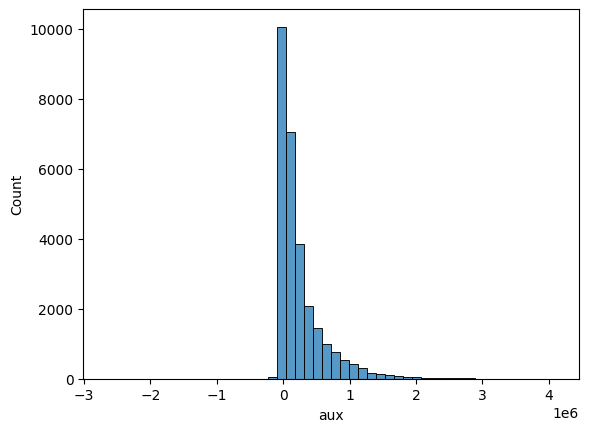

In [124]:
sns.histplot(base_credito_limpa['aux'], bins= 50)

In [ ]:
base_credito_limpa[base_credito_limpa['aux']<0]

,id,lim_credito,sexo,educacao,est_civil,idade,sts_1,sts_2,sts_3,sts_4,...,fatura_5,fatura_6,v_pg_1,v_pg_2,v_pg_3,v_pg_4,v_pg_5,v_pg_6,aux,inadimplente
0,1,20000.0,2,2,1,24,-2,-2,-1,-1,...,3102.0,3913.0,0.0,0.0,0.0,0.0,689.0,0.0,7015.0,1
1,2,120000.0,2,2,2,26,2,0,0,0,...,1725.0,2682.0,2000.0,0.0,1000.0,1000.0,1000.0,0.0,12077.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14027.0,29239.0,5000.0,1000.0,1000.0,1000.0,1500.0,1518.0,90635.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,48233.0,46990.0,1000.0,1069.0,1100.0,1200.0,2019.0,2000.0,222946.0,0
4,5,50000.0,1,2,1,57,0,0,0,-1,...,5670.0,8617.0,679.0,689.0,9000.0,10000.0,36681.0,2000.0,50290.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28277,29996,220000.0,1,3,1,39,0,0,0,0,...,192815.0,188948.0,1000.0,5000.0,3047.0,5003.0,20000.0,8500.0,682799.0,0
28278,29997,150000.0,1,3,2,43,0,0,-1,-1,...,1828.0,1683.0,0.0,0.0,129.0,8998.0,3526.0,1837.0,6692.0,0
28279,29998,30000.0,1,2,2,37,0,0,-1,2,...,3356.0,3565.0,3100.0,2000.0,4200.0,22000.0,0.0,0.0,39196.0,1
28280,29999,80000.0,1,3,1,41,-1,0,0,0,...,78379.0,-1645.0,1804.0,52964.0,1926.0,1178.0,3409.0,85900.0,119430.0,1


In [126]:
base_credito_limpa.loc[31]

id                  34.0
lim_credito     500000.0
sexo                 2.0
educacao             2.0
est_civil            1.0
idade               54.0
sts_1               -2.0
sts_2               -2.0
sts_3               -2.0
sts_4               -2.0
sts_5               -2.0
sts_6               -2.0
fatura_1          8981.0
fatura_2         71439.0
fatura_3          7521.0
fatura_4         22722.0
fatura_5          4152.0
fatura_6         10929.0
v_pg_1           51582.0
v_pg_2             981.0
v_pg_3           71439.0
v_pg_4            7521.0
v_pg_5           22827.0
v_pg_6            4152.0
aux             -32758.0
inadimplente         0.0
Name: 31, dtype: float64

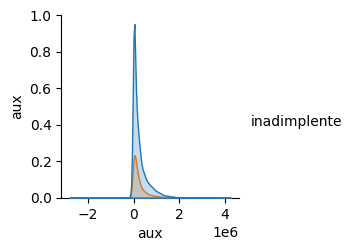

In [128]:
sns.pairplot(base_credito_limpa[['aux', 'inadimplente']], hue = 'inadimplente')